# Part 4 : line graphs, hamiltonian paths and eulerian paths

1) Here are my definitions of eulerian and hamiltonian paths:
   - Existence of an eulerian path in a graph: a eulerian path is when a graph contains a path that uses every edge (line between two nodes, directional or not) exactly once.
   - Existence of a hamiltonian path in a graph: a hamiltonian path is when a graph contains a path that visits every vertices  (node, points) exacly once.

To explain the connection between the two paths defined above, I will need to explain what the line graph of a graph is: 
   
   A line graph is the "inverse" of the given graph, meaning that the line graph's vertices represent the graph's edges and the line graph's edges correspond to the adjacent edges of the graph's edge. 

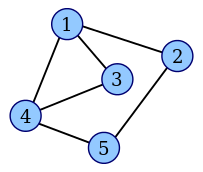
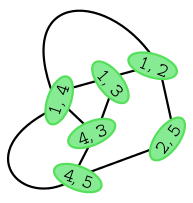

Graph ---> Line graph

If a graph has an Eulerian path, then its line graph has a Hamiltonian path, and if a line graph has a Hamiltonian path, then its graph has an Eulerian path.
This is because going through each edge in a graph (Eulerian path), corresponds to visiting each vertex exactly once in its line graph (a Hamiltonian path).


2) The following code will generate multiple random graphs, try to find a Eularian path, convert it to its line graph, and try to find a Hamiltonian path. The second section will display those informations, and raise a warning in case the graph has a Eularian path, but its line graph doesn't have a Hamiltonian path.

Also, as the Hamiltonian path algorithm of networkx require a tournament, and a tournament guarentees that there is a Hamiltonian path, and considering the complexity of such an algorithm, I asked Chat-GPT to create a function to check for Hamiltonian paths. Indeed, the graphs I generate are very small, so it's still feasible to process it within a reasonable timeframe.

In [ ]:
import networkx as nx

# Generated via chat-GPT
def has_hamiltonian_path(G):
    def backtrack(path):
        if len(path) == len(G):
            return True
        for neighbor in set(G.neighbors(path[-1])) - set(path):
            if backtrack(path + [neighbor]):
                return True
        return False

    for starting_node in G.nodes():
        if backtrack([starting_node]):
            return True
    return False

# Constants
ITERATIONS = 10
VERTICES = 5
EDGES_PROBA = 0.5

for i in range(ITERATIONS):
    graph = nx.gnp_random_graph(VERTICES, EDGES_PROBA, directed=True)
    line_graph = nx.line_graph(graph)
    has_eulerian = nx.has_eulerian_path(graph)
    has_hamiltonian = has_hamiltonian_path(line_graph)

    print("Graph n°" + str(i) + " (" + str(len(graph.nodes)) + " nodes and " + str(len(graph.edges)) + " edges):")
    print("Has Eulerian path: " + str(has_eulerian))
    print("Has Hamiltonian path: " + str(has_hamiltonian))
    if has_eulerian and not has_hamiltonian:
        print("WARNING: Found an error! Has eulerian path but line graph don't have a hamiltonian path!")
    print("--------------------")


Running this program, we can see that for every graph with an Eularian path, its line graph have a hamiltonian path. The program will render a warning otherwise. You can increase the INTERATIONS or run it multiple times, but I couldn't find error in the random examples.

3) The harder problem would be the search of a Hamiltonian path, because this problem is NP-complete. Indeed, [the complexity of such an algorithm is O(N * N!)](https://www.hackerearth.com/practice/algorithms/graphs/hamiltonian-path/tutorial/) in the worst case, whereas the Eulerian path problem have simple necessary and sufficient conditions that can be checked in polynomial time.